In [114]:
import os
import geopandas as gpd
import geemap
import xml.etree.ElementTree as ET
import pandas as pd
from shapely.geometry import LineString

# constante requerida
#namespace = {"kml": "http://www.opengis.net/kml/2.2"}

In [115]:
# Directorio donde están los archivos KML
path_wayp = r'C:\Documents\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2023\PROYECTO AREA LIBERACION\LOGS\log_wp_todo/'
propiedades = os.listdir(path_wayp)
propiedades

['prop']

In [117]:
list_prop = []
list_lote = []
list_recorrido = []
col = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Latitude', 'Longitude', 'J', 'K']
for propiedad in propiedades:
    path_prop = path_wayp + propiedad + '/'
    lotes = os.listdir(path_prop)
    for lote in lotes:
        print(lote)
        path_lote = path_prop + lote
        df = pd.read_csv(path_lote, sep='\t', names=col, skiprows=1)
        
        df = df[df['Latitude']!=0]
        
        df['Latitude'] = df['Latitude'].astype(str)
        df['Longitude'] = df['Longitude'].astype(str)
        
        df['Latitude'] = df['Latitude'].str.replace(',', '.')
        df['Longitude'] = df['Longitude'].str.replace(',', '.')
        df = df[df['Latitude']!='0.00000000']
        print(df[['Latitude', 'Longitude']])
        
        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
        line = LineString(gdf.geometry.tolist())
        list_prop.append(propiedad)
        list_lote.append(lote)
        list_recorrido.append(line)

05-10-2023_L2_L5_L7.2_L11.waypoints
       Latitude    Longitude
0    -17.309221   -63.316483
3   -17.3089484  -63.3155327
5   -17.3093525  -63.3218591
7   -17.3096246  -63.3218652
9   -17.3093892  -63.3181786
11  -17.3098299  -63.3208244
13  -17.3098968  -63.3218713
15  -17.3090803  -63.3218531
17  -17.3086625  -63.3153114
19  -17.3083884  -63.3152739
21  -17.3088079  -63.3218429
23  -17.3085339  -63.3218083
25  -17.3081142  -63.3152363
27  -17.3078407   -63.315209
29  -17.3082599  -63.3217738
31  -17.3079859  -63.3217392
33  -17.3075675  -63.3151873
35  -17.3072948  -63.3151725
37  -17.3076222  -63.3202993
39   -17.307339  -63.3201195
41  -17.3070243  -63.3151922
43  -17.3067538  -63.3152119
45  -17.3070557  -63.3199397
47  -17.3067725  -63.3197599
49  -17.3064833  -63.3152316
51  -17.3063914  -63.3180484
53  -17.3064892  -63.3195801
05-10-2023_L5_L7.2_L7.3_L8.1_L8.2.waypoints
       Latitude    Longitude
0    -17.309221   -63.316483
3   -17.3122283  -63.3158503
5   -17.3132956  -63.

In [118]:
list_recorrido

[<LINESTRING (-63.316 -17.309, -63.316 -17.309, -63.322 -17.309, -63.322 -17....>,
 <LINESTRING (-63.316 -17.309, -63.316 -17.312, -63.322 -17.313, -63.323 -17....>,
 <LINESTRING (-63.306 -17.309, -63.305 -17.309, -63.31 -17.31, -63.31 -17.31,...>,
 <LINESTRING (-63.308 -17.309, -63.31 -17.309, -63.303 -17.308, -63.303 -17.3...>,
 <LINESTRING (-62.994 -17.227, -62.992 -17.225, -62.987 -17.227, -62.987 -17....>,
 <LINESTRING (-63.217 -17.287, -63.217 -17.287, -63.216 -17.289, -63.216 -17....>,
 <LINESTRING (-63.219 -17.287, -63.222 -17.28, -63.222 -17.28, -63.222 -17.28...>,
 <LINESTRING (-63.217 -17.287, -63.216 -17.288, -63.213 -17.291, -63.213 -17....>,
 <LINESTRING (-63.219 -17.287, -63.219 -17.287, -63.218 -17.292, -63.218 -17....>,
 <LINESTRING (-62.975 -17.236, -62.974 -17.234, -62.975 -17.236, -62.973 -17....>,
 <LINESTRING (-63.017 -17.27, -63.016 -17.269, -63.017 -17.264, -63.018 -17.2...>,
 <LINESTRING (-62.927 -17.218, -62.927 -17.216, -62.922 -17.214, -62.922 -17....>,
 <LI

In [119]:
data_lineas = {
    'geometry': list_recorrido,
    'propiedad': list_prop,
    'lotes' : list_lote
}

In [120]:
gdf_lineas = gpd.GeoDataFrame(data_lineas)

In [121]:
gdf_lineas.crs = "EPSG:4326"

In [122]:
gdf_lineas = gdf_lineas.to_crs(epsg=32720)

<Axes: >

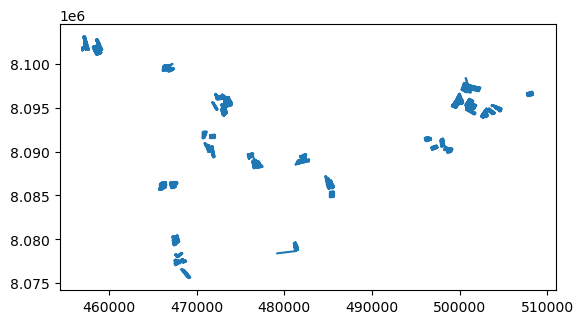

In [123]:
gdf_lineas.plot()

In [124]:
len(gdf_lineas)

73

In [126]:
gdf_lineas.to_file('capa_waypoinst', driver="ESRI Shapefile")

In [127]:
gdf_lineas

,geometry,propiedad,lotes
0,"LINESTRING (466368.116 8086209.237, 466469.053...",prop,05-10-2023_L2_L5_L7.2_L11.waypoints
1,"LINESTRING (466368.116 8086209.237, 466435.898...",prop,05-10-2023_L5_L7.2_L7.3_L8.1_L8.2.waypoints
2,"LINESTRING (467465.815 8086244.532, 467556.930...",prop,06-10-2023_L35 L33.waypoints
3,"LINESTRING (467295.821 8086222.135, 467009.631...",prop,07-10-2023_L38 L36 L34 L30 L28 L26.waypoints
4,"LINESTRING (500618.856 8095359.795, 500854.204...",prop,08-10-2023_ER L23.waypoints
...,...,...,...
68,"LINESTRING (471452.566 8090685.613, 470896.988...",prop,"28-09-2023_L2,L3,L4,L5.waypoints"
69,"LINESTRING (472097.405 8091959.951, 471557.279...",prop,28-09-2023_L28.waypoints
70,"LINESTRING (466451.987 8099732.047, 466898.351...",prop,28-10-2023_L9.waypoints
71,"LINESTRING (498239.841 8090599.419, 498328.320...",prop,28-10-2023_L_19_1.waypoints
